In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from vtl.Photo import Photometry
from vtl.Get_sensitivity import Get_Sensitivity
from spec_id import Highest_likelihood_model_galaxy, Galaxy_ids, Analyze_Stack_avgage_cont_feat_gal_age_correct
import pandas as pd
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
def Eff_wv(wv,t):
    tp = np.trapz(((t * np.log(wv)) / wv), wv)
    bm = np.trapz(t / wv, wv)

    return np.exp(tp / bm)

In [4]:
def FWHM(wv,t,effwv):
    top = np.trapz((t * np.log(wv/effwv)**2) / wv, wv)
    bot = np.trapz(t / wv, wv)
    sigma = np.sqrt(top/bot)
    return np.sqrt(8*np.log(2))*sigma*effwv

In [7]:
filt_s = ['f_F606Wcand','f_F606W','f_R','f_Rc','f_F775W','f_I','f_F814Wcand','f_F850LP','f_F850LPcand','f_F098M','f_F105W',
          'f_F125W','f_J','f_tenisJ','f_F140W','f_H','f_tenisK','f_Ks','f_IA624','f_IA651','f_IA679','f_IA709','f_IA738',
          'f_IA767','f_IA797','f_IA827','f_IA856']

filt_snum = [214,214,260,292,216,'f_I',217,240,240,201,202,203,34,220,204,36,222,37,190,191,192,193,194,195,196,197,198]
# filt_snum = [214,214,260,292,216,217,240,240,201,202,203,34,220,204,36,222,37,190,191,192,193,194,195,196,197,198]

filt_n = ['f_F606W','f_R','f_Rs','f_I','f_F775W','f_Z','f_F850LP','f_F105W','f_F125W','f_J','f_F140W','f_H','f_Ks']
filt_nnum = [214,285,232,283,216,284,240,202,203,224,204,225,226]

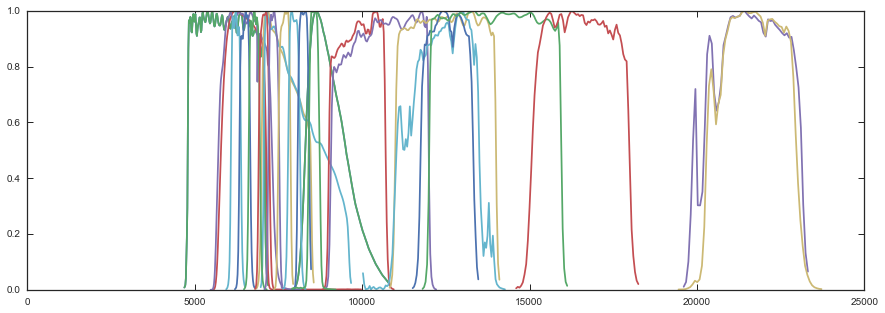

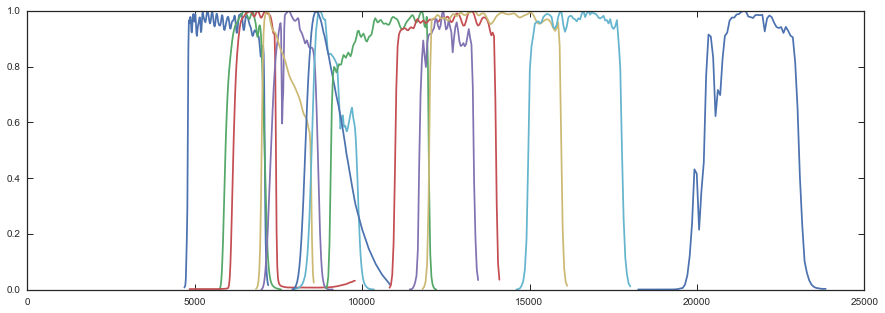

In [17]:
plt.figure(figsize=[15,5,])
for i in range(len(filt_snum)):
    if filt_snum[i] != 'f_I':
        # print filt_snum[i]
        fwv,t =Get_Sensitivity(filt_snum[i])
        plt.plot(fwv,t)
        
plt.show()
plt.close()

plt.figure(figsize=[15,5,])
for i in range(len(filt_nnum)):
    fwv,t =Get_Sensitivity(filt_nnum[i])
    plt.plot(fwv,t) 
plt.show()
plt.close()

575.781979606
8549.06055567 0.15859788784


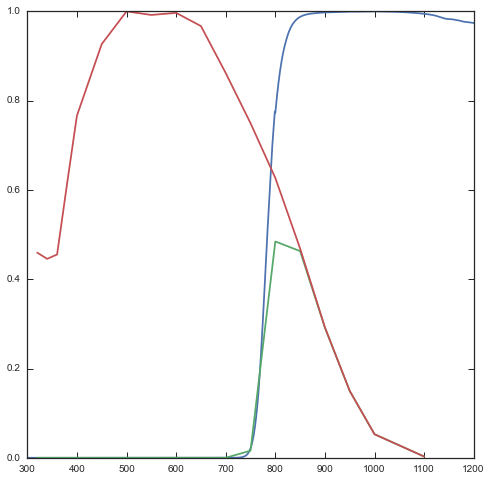

In [22]:
%matplotlib inline
wv,t=Readfile('845.dat',h=2)
cwv,ct=Readfile('WFI_CCD57qe',seperator='   ')

nt=interp1d(wv,t/max(t))(cwv)

ewv = Eff_wv(cwv*10,nt* ct/max(ct))
fwhm = FWHM(cwv*10,nt * ct/max(ct),ewv)

print ewv,fwhm

plt.figure(figsize=[8,8])
plt.plot(wv,t/max(t))
plt.plot(cwv,nt * ct/max(ct))
plt.plot(cwv,ct/max(ct))
plt.show()
plt.close()

In [33]:
filt_num = [214,214,260,292,216,'f_I',217,240,240,201,202,203,34,220,204,36,222,37,190,191,192,193,194,195,
             196,197,198,214,285,232,283,216,284,240,202,203,224,204,225,226]

filters=['f_F606Wcand','f_F606W','f_R','f_Rc','f_F775W','f_I','f_F814Wcand','f_F850LP','f_F850LPcand','f_F098M','f_F105W',
          'f_F125W','f_J','f_tenisJ','f_F140W','f_H','f_tenisK','f_Ks','f_IA624','f_IA651','f_IA679','f_IA709','f_IA738',
          'f_IA767','f_IA797','f_IA827','f_IA856','f_F606W','f_R','f_Rs','f_I','f_F775W','f_Z','f_F850LP','f_F105W',
          'f_F125W','f_J','f_F140W','f_H','f_Ks']

effwvs=[]
fwhms=[]

for i in range(len(filt_num)):
    if filt_num[i] != 'f_I':
        fwv,t =Get_Sensitivity(filt_num[i])
        effwvs.append(Eff_wv(fwv,t))
        fwhms.append(FWHM(fwv,t,effwvs[i]))
    else:
        effwvs.append(Eff_wv(cwv*10,nt* ct/max(ct)))
        fwhms.append(FWHM(cwv*10,nt* ct/max(ct),ewv))

In [36]:
np.round(fwhms,0)

array([ 1550.,  1550.,   943.,  1103.,   990.,  1356.,  1585.,  1235.,
        1235.,  1163.,  1979.,  2041.,  1774.,  1080.,  2676.,  1991.,
        2135.,  1854.,   225.,   240.,   250.,   237.,   237.,   262.,
         266.,   245.,   266.,  1550.,   817.,  1047.,   982.,   990.,
         970.,  1235.,  1979.,  2041.,  1108.,  2676.,  1912.,  2073.])

214


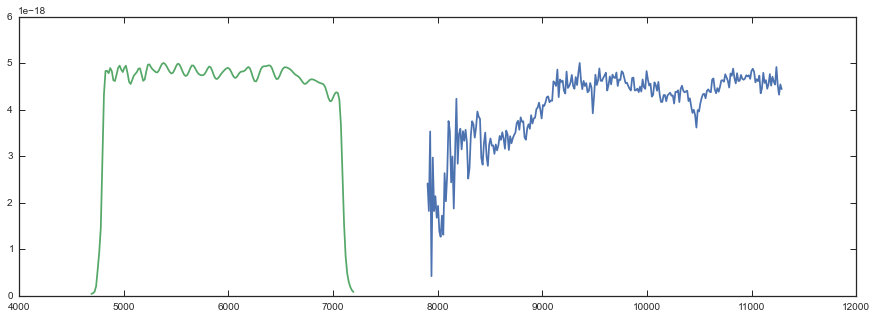

214


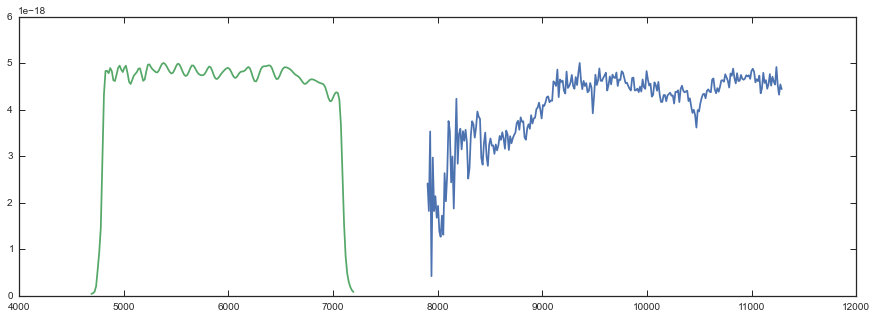

260


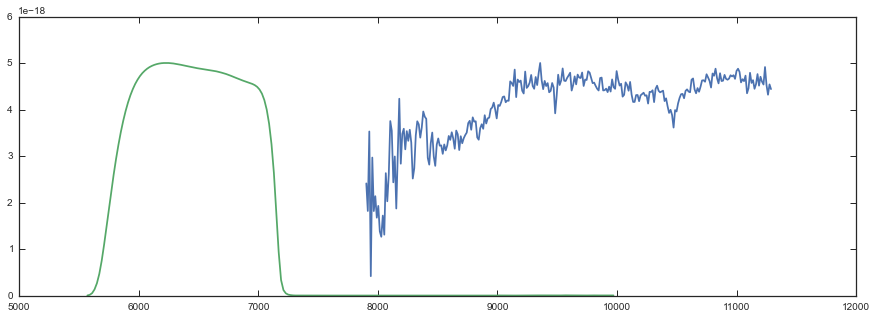

292


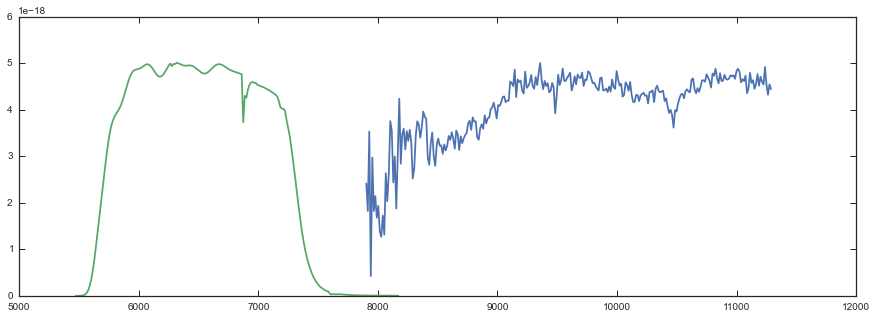

216


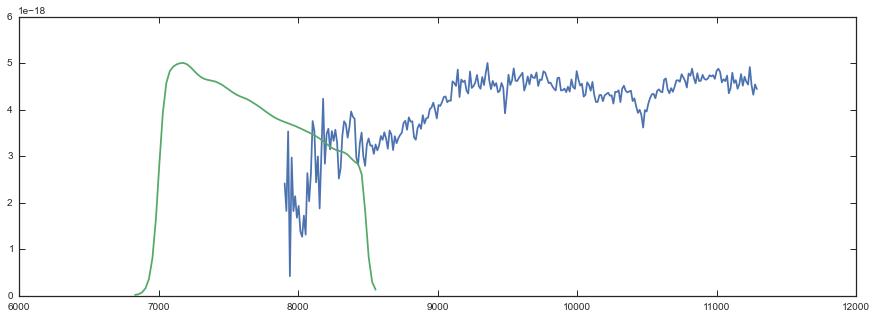

217


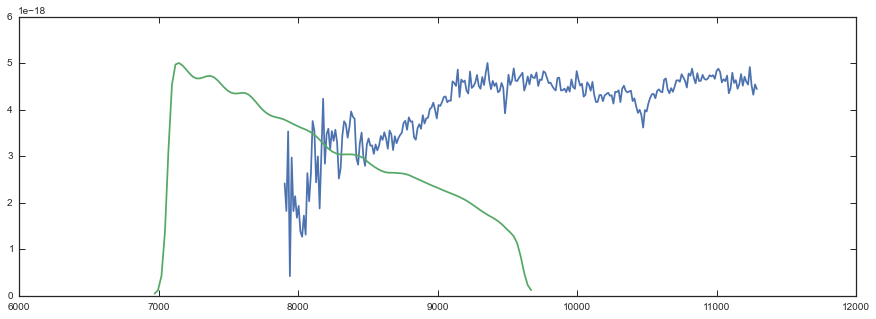

240


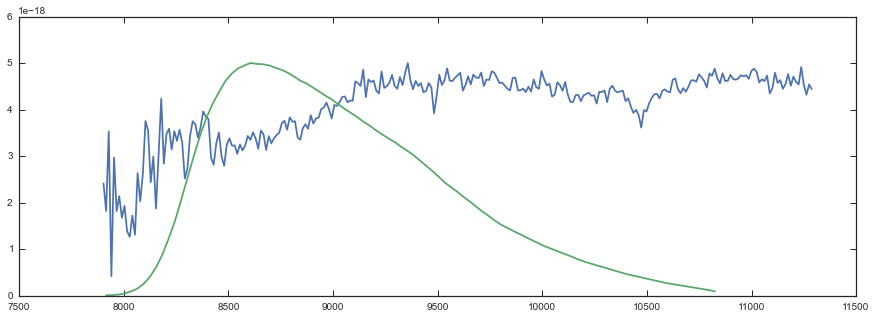

240


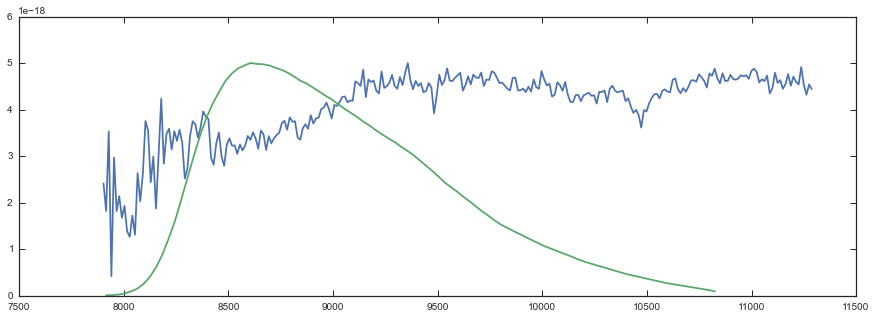

201


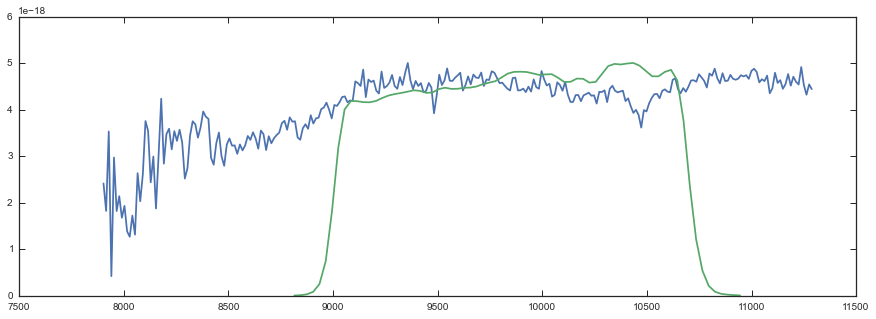

202


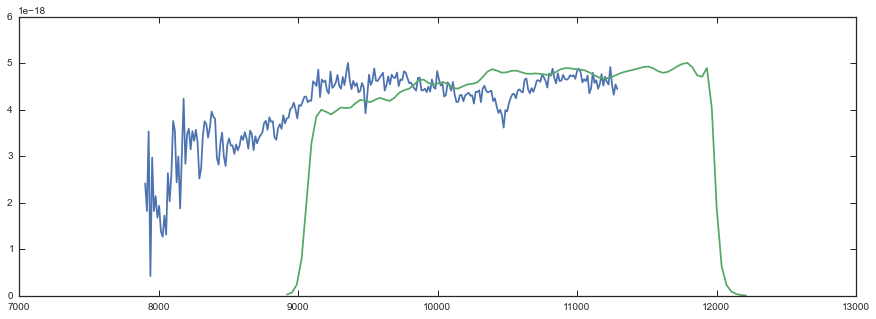

203


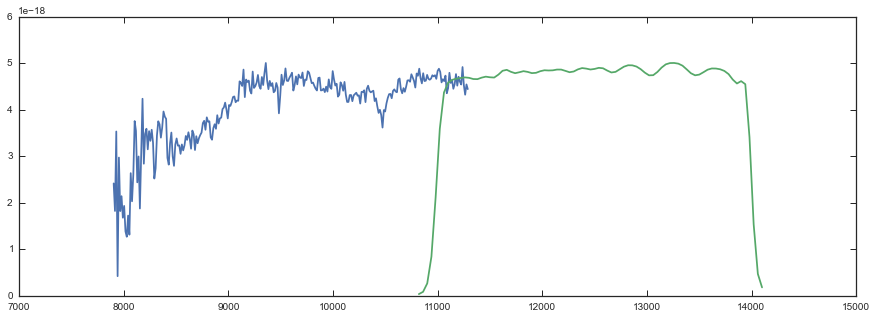

34


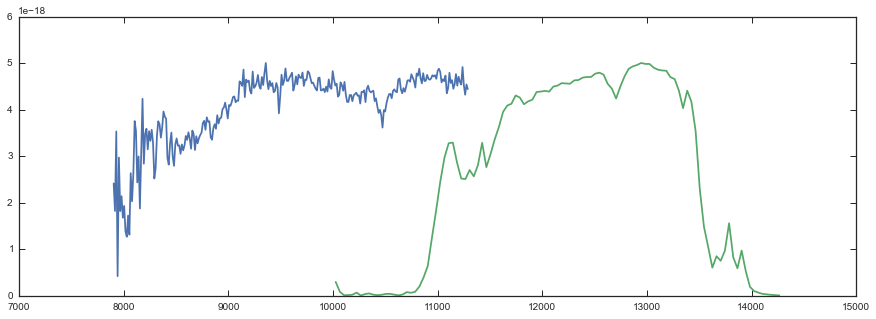

220


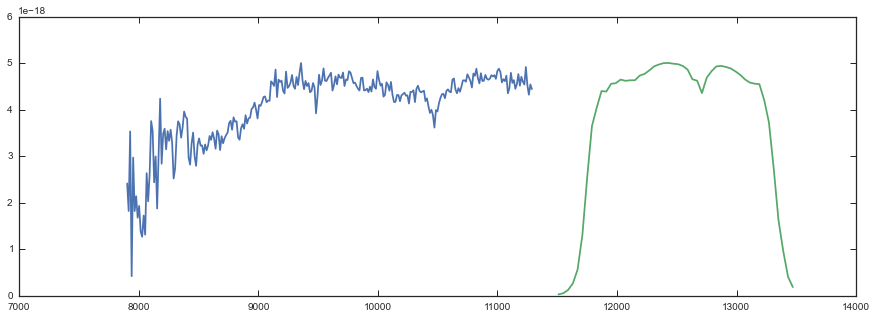

204


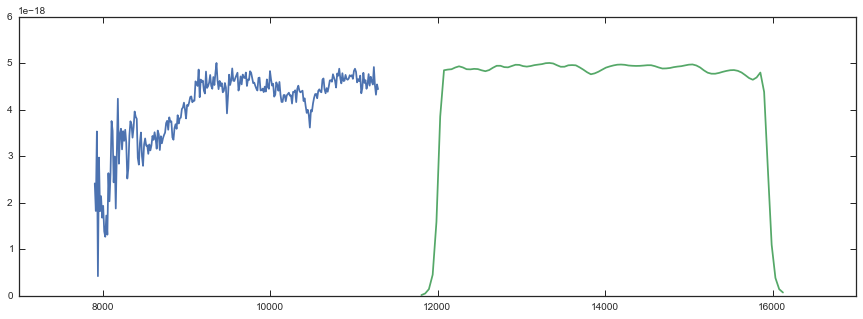

36


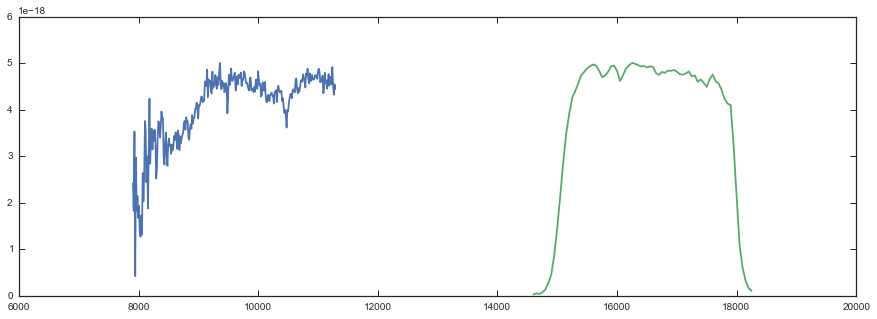

222


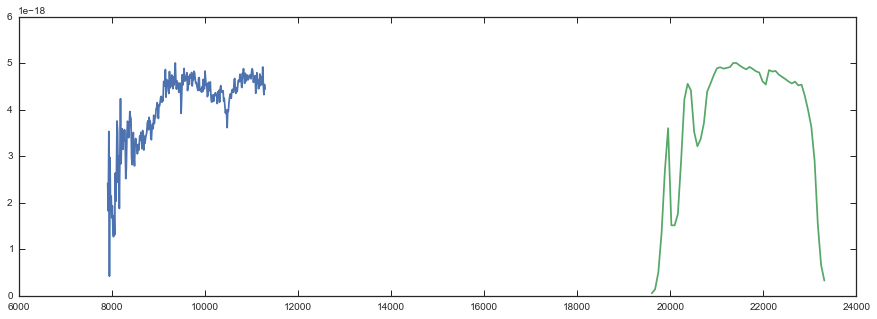

37


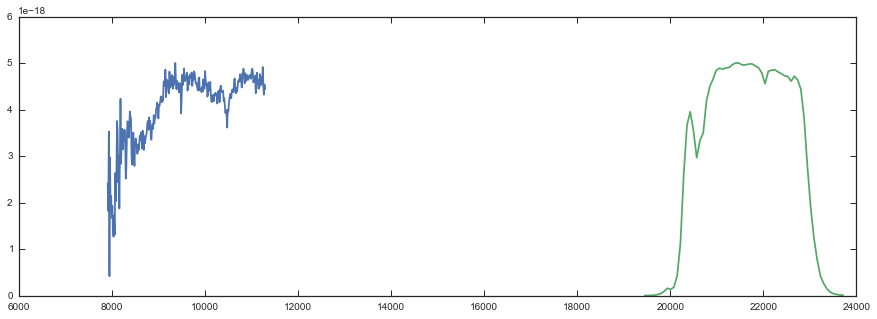

190


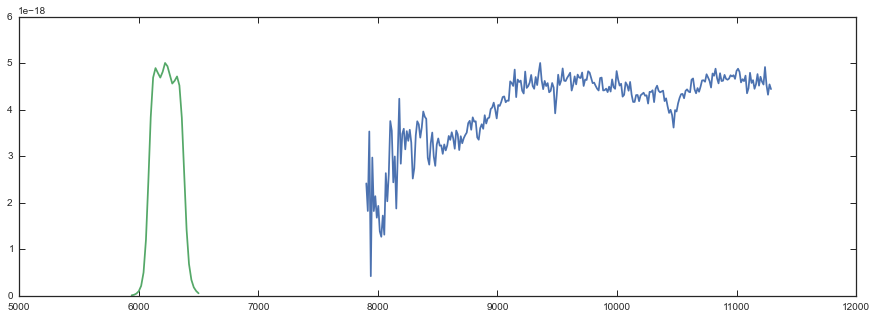

191


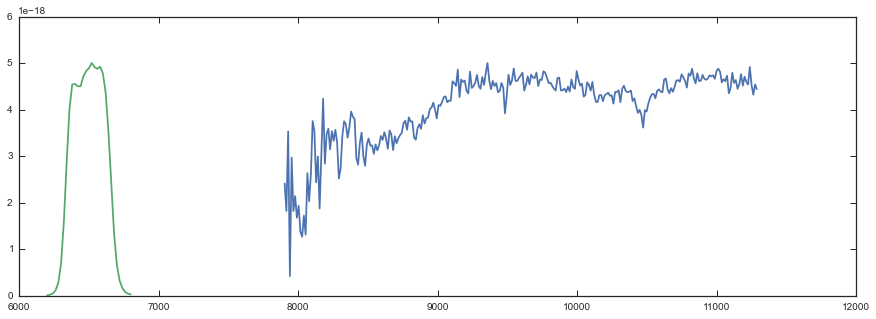

192


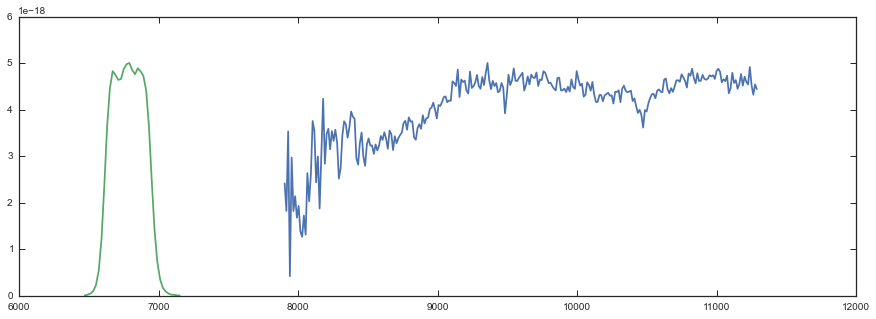

193


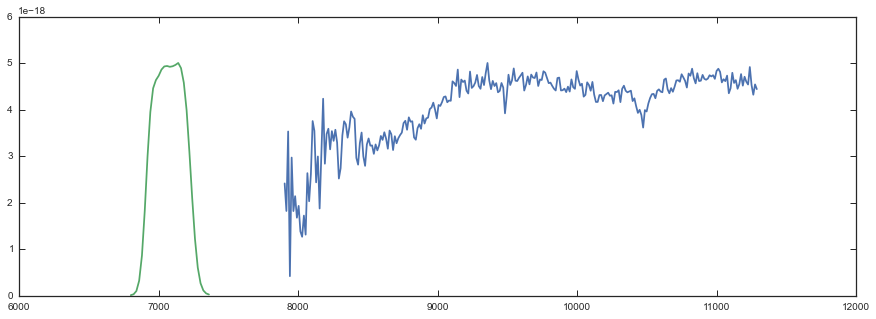

194


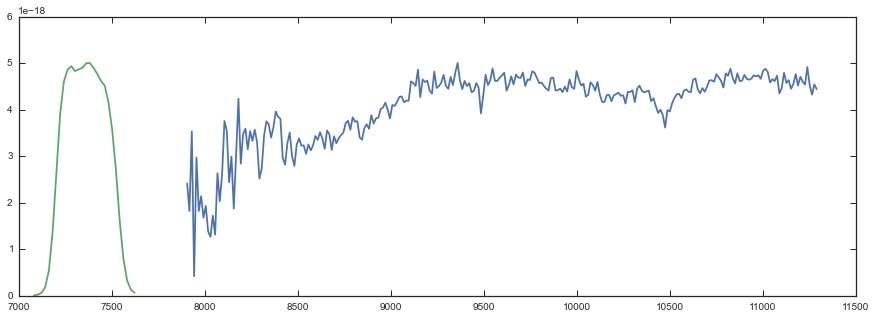

195


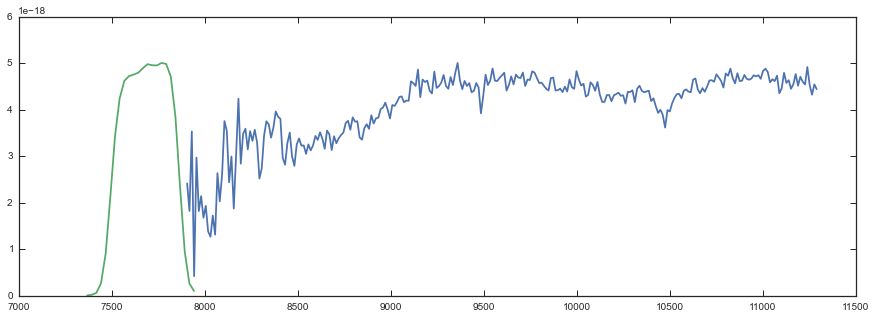

196


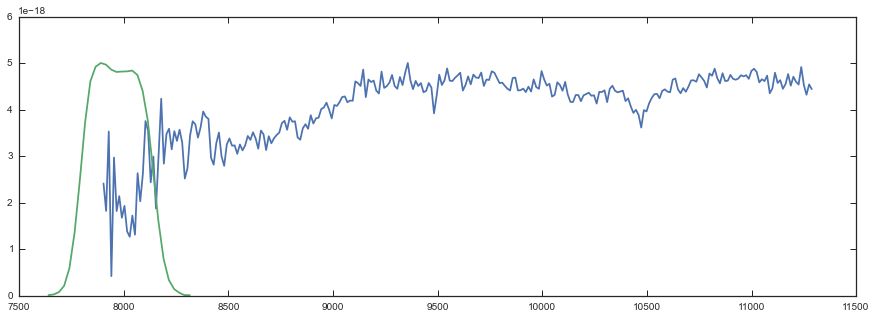

197


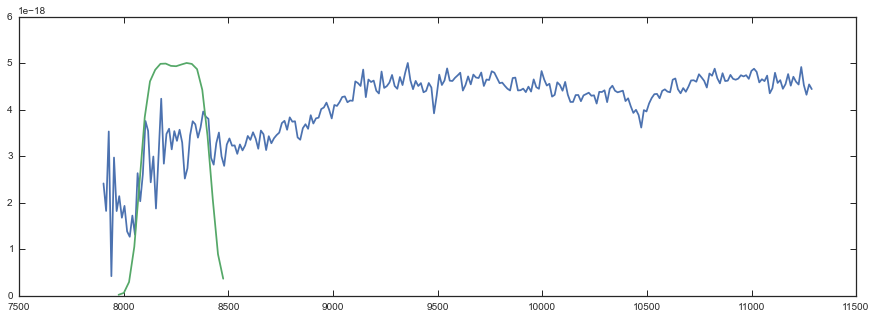

198


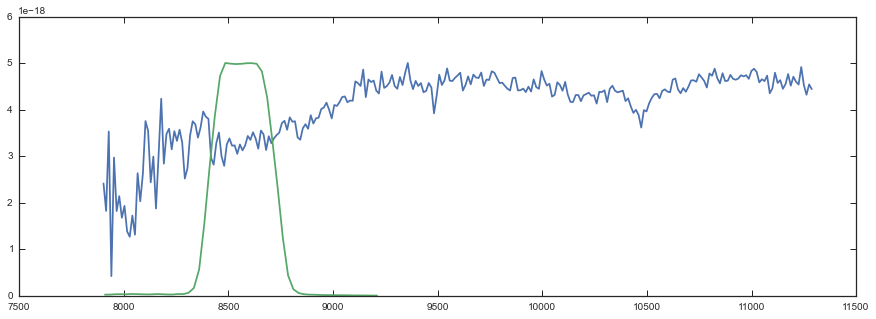

214


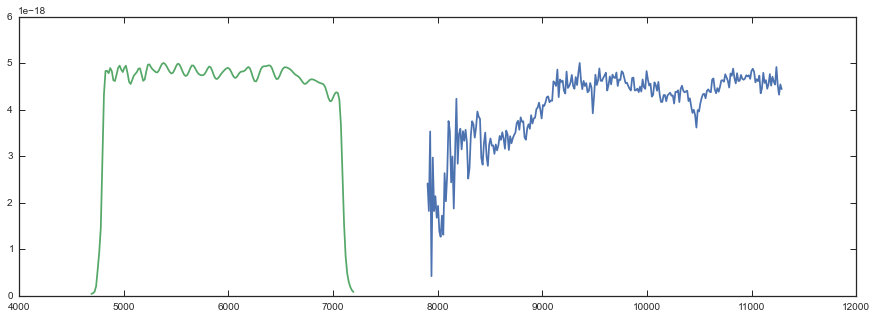

285


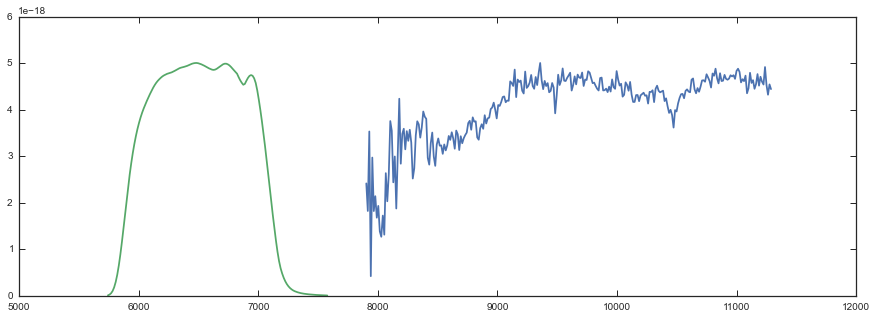

232


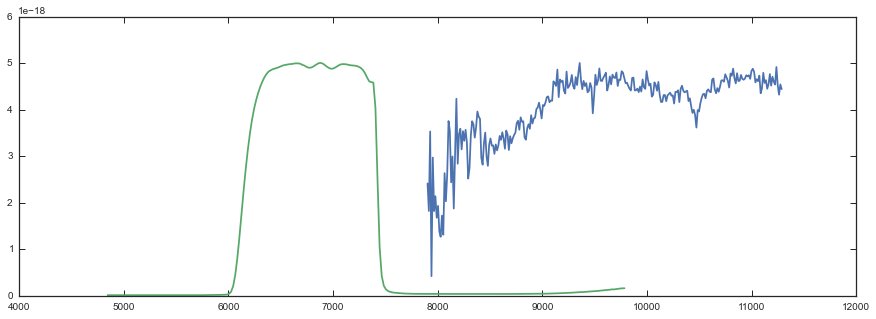

283


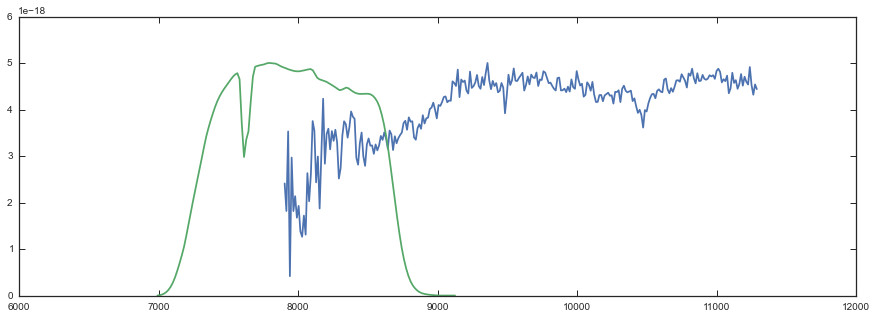

216


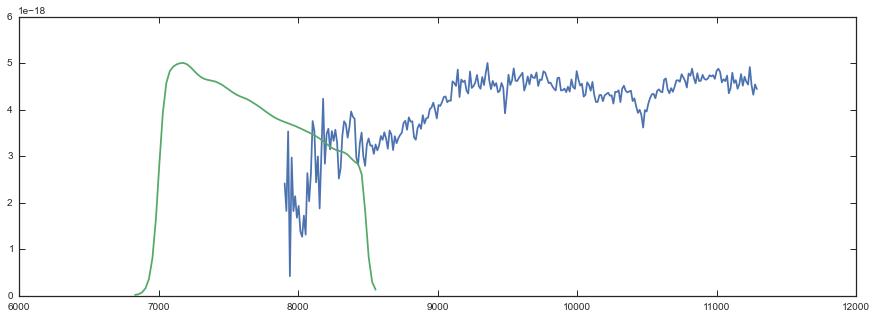

284


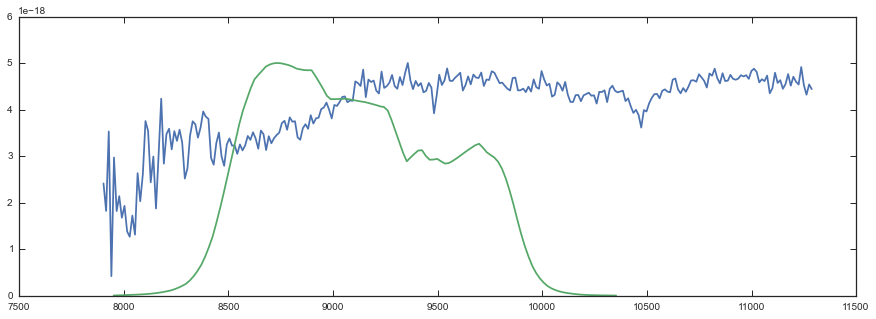

240


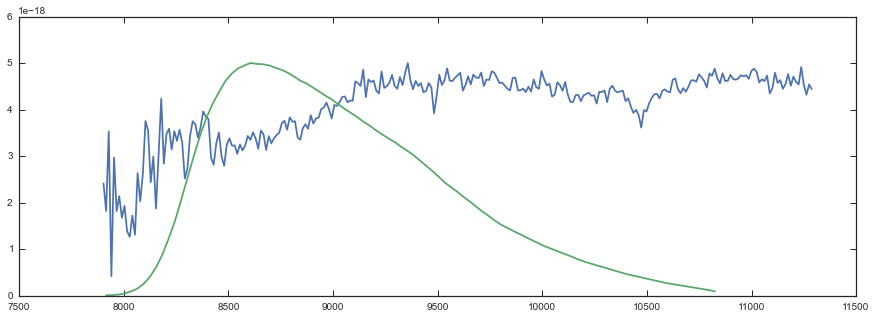

202


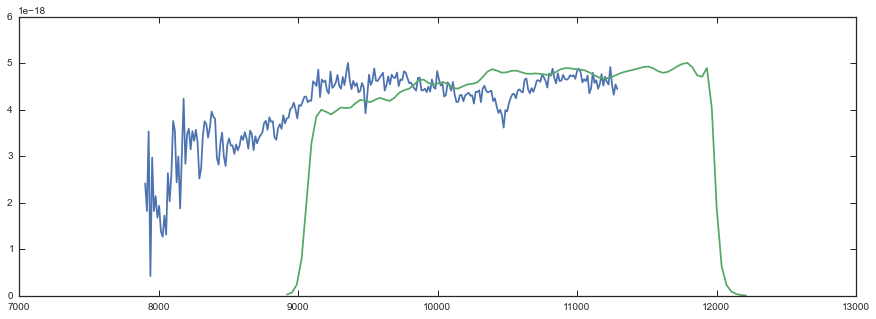

203


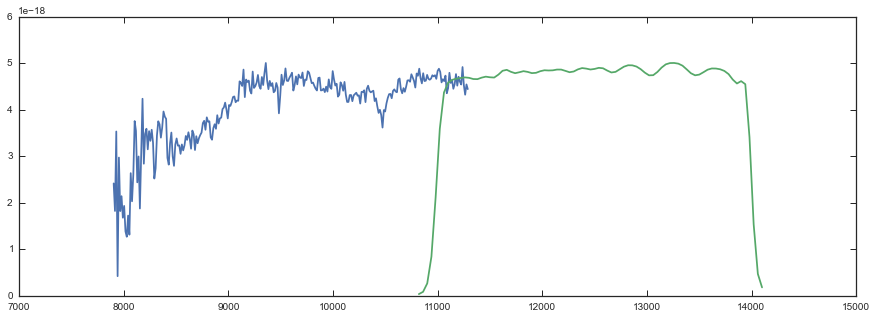

224


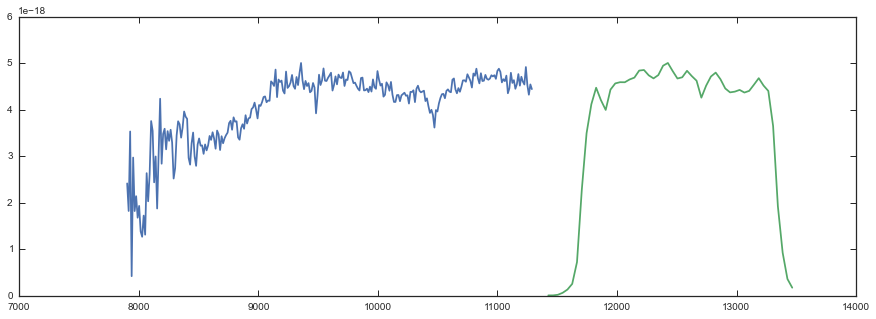

204


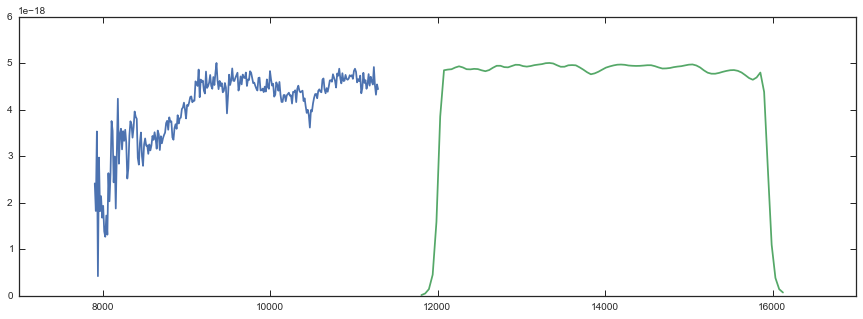

225


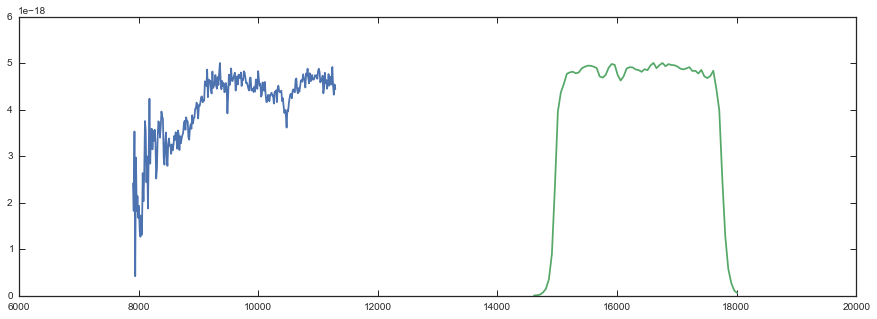

226


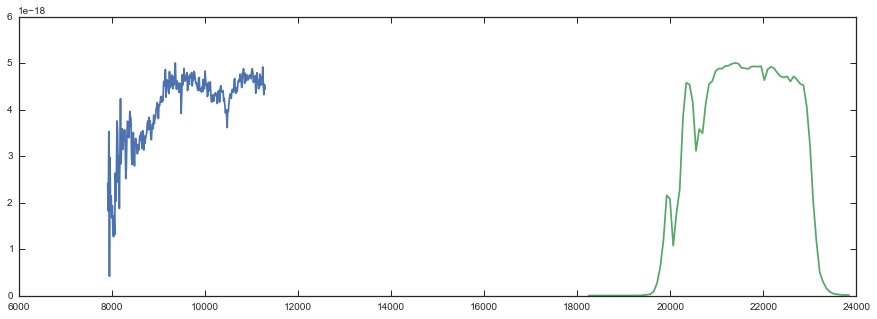

In [6]:
%matplotlib inline

filt_num = [214,214,260,292,216,'f_I',217,240,240,201,202,203,34,220,204,36,222,37,190,191,192,193,194,195,
             196,197,198,214,285,232,283,216,284,240,202,203,224,204,225,226]

wv,fl,er = np.load('spec_stacks_jan24/s39170_stack.npy')
wv,fl,er=np.array([wv[7900<wv[wv<11300]],fl[7900<wv[wv<11300]],er[7900<wv[wv<11300]]])


for i in range(len(filt_num)):
    if filt_num[i] != 'f_I':
        print filt_num[i]
        fwv,t =Get_Sensitivity(filt_num[i])
        plt.figure(figsize=[15,5,])
        plt.plot(wv,fl)
        plt.plot(fwv,t*max(fl))
        plt.show()
        plt.close()